# `dmnautilus`

[`dmnautilus`](http://cxc.harvard.edu/ciao/ahelp/dmnautilus.html) is a compiled tool in CIAO. It implements a quad-tree adaptive bin algorithm. If the SNR in the image values is above the input threshold, the image is divided into 2x2. Each sub-image is then checked. The algorithm stops when SNR threshold is no longer met and/or single pixel remains.


In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Sun Jan 20 11:16:36 EST 2019


In [2]:
# Routine to display images using ds9 in notebook
display_map()
{
img=$1
map=$2
png=$3

ds9 -geom 1550x824 -scale asinh -scale limits 0 200 \
  -zoom 2 -cmap load sunset-in-atlantis.sao  \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  $img \
  -frame new -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
  $map -scale linear -scale mode minmax \
  -regions select all -regions color black -regions select none \
  -tile yes \
  -saveimage png $png -exit 

display < $png
}

In [3]:
/bin/rm -rf ./tmp
mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

### Example

Keeps sub-dividing the image until the SNR falls below 15.8 (~300 counts).



In [4]:
dmnautilus img.dss.fits nautilus.img 15.8 outmask=nautilus.map clob+

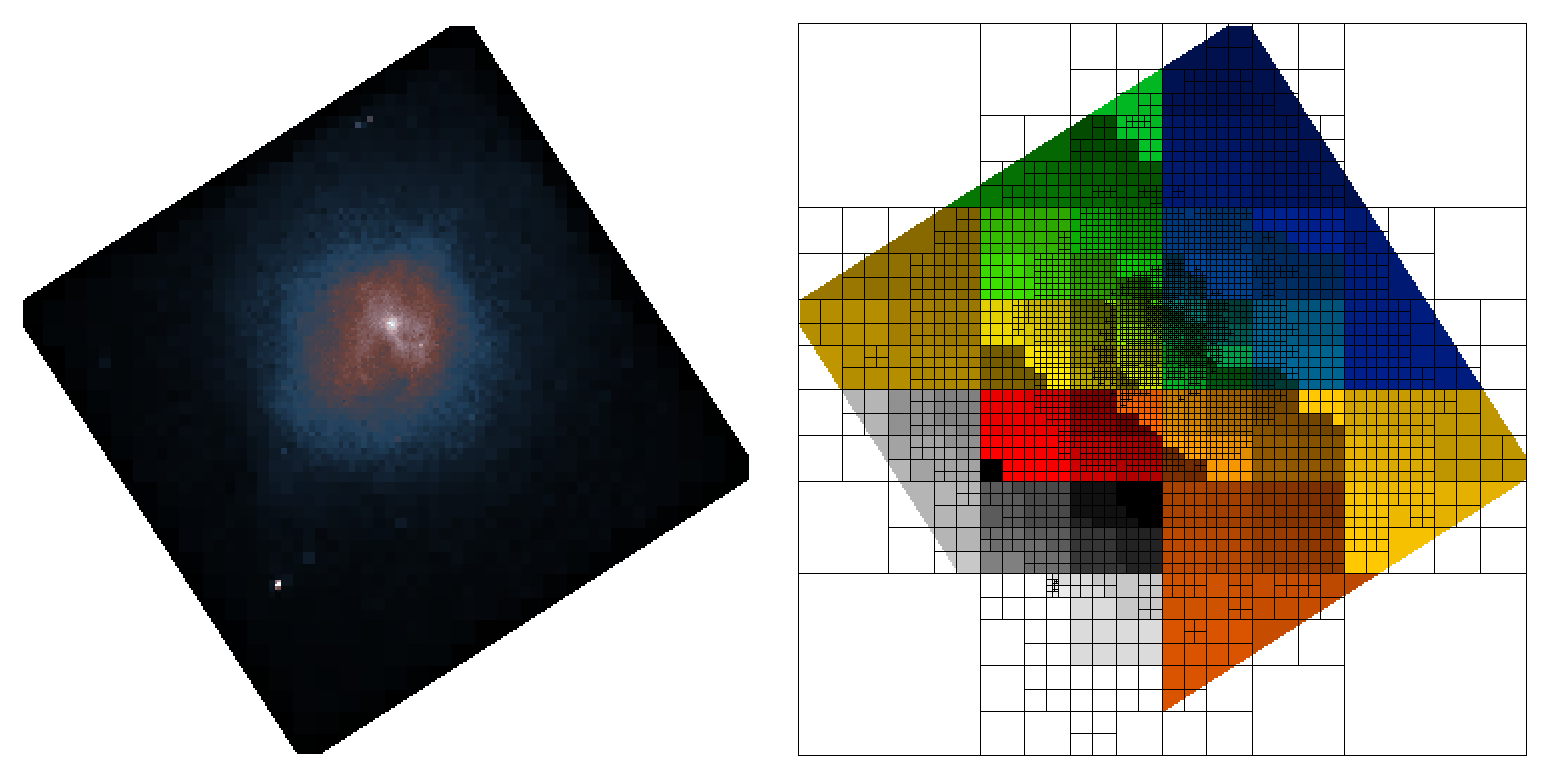

In [5]:
# Left if adaptively binned image, right is the map file
display_map nautilus.img nautilus.map nautilus.png

(Left) Adaptively binned image.  (Right) nautilus map where each pixel indicates which pixels belong to each group.

We see that the center of the image is almost entirely ungrouped.

> Note: Unlike some of the algorithms, the input image does not need to be smoothed.
